In [67]:
# Dependencies and Setup
import json
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime as dt
from scipy.stats import linregress

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

595

In [61]:
# cities=cities[:5]

Perform API Calls
Perform a weather check on each city using a series of successive API calls.
Include a print log of each city as it'sbeing processed (with the city number and city name).

In [3]:
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="
query_url= base_url +  api_key + "&q=" + city
print(query_url)


http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9535eb11d60ce28ef59e939de006a6c9&q=khatanga


In [59]:
# Create a base URL

# base_url="http://api.openweathermap.org/data/2.5/weather?"

base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="

#Create a counter for records retreival
record=1

#create a dataframe for cities


city_weather= pd.DataFrame({"City": cities})

#Create empty lists to append values of lat, lon, max temp, humidity, cloud coverage, wind speed, country, datetime

city_weather["Lat"]= ""
city_weather["Lng"]= ""
city_weather["Max Temp"]= ""
city_weather["Humidity"]=""
city_weather["Cloudiness"]= ""
city_weather["Wind Speed"]= ""
city_weather["Country"]= ""
city_weather["Date"]= ""


#Print beginning of loop 
print("Begin Data Retrieval")
print("-------------------------")



#loop through cities_pd and add rows

for index, row in city_weather.iterrows():
    
    city=row["City"]
    
    query_url= base_url + api_key + "&q=" + city
    weather_response=requests.get(query_url).json()
     
                                        
    try:
        print(f"Processing Record {record} | {city} ")
                                        
        city_weather.loc[index, "Lat"]=weather_response["coord"]["lat"]
        city_weather.loc[index, "Lng"]=weather_response["coord"]["lon"]
        city_weather.loc[index, "Max Temp"]=weather_response["main"]["temp_max"]
        city_weather.loc[index, "Humidity"]=weather_response["main"]["humidity"]
        city_weather.loc[index, "Cloudiness"]=weather_response["clouds"]["all"]
        city_weather.loc[index, "Wind Speed"]=weather_response["wind"]["speed"]
        city_weather.loc[index, "Country"]=weather_response["sys"]["country"]
        city_weather.loc[index, "Date"]=weather_response["dt"]
       

    except:
        
        print("City not found. Skipping...")
        
        
    
    record=record +1       


print("----------------------")
print("Data Retrival Complete")
print("----------------------")

Begin Data Retrieval
-------------------------
Processing Record 1 | khatanga 
Processing Record 2 | constitucion 
Processing Record 3 | hobart 
Processing Record 4 | ardakan 
Processing Record 5 | albany 
Processing Record 6 | igrim 
Processing Record 7 | rikitea 
Processing Record 8 | varniai 
Processing Record 9 | yellowknife 
Processing Record 10 | caravelas 
Processing Record 11 | georgetown 
Processing Record 12 | vostok 
Processing Record 13 | bengkulu 
Processing Record 14 | thompson 
Processing Record 15 | rocha 
Processing Record 16 | andros town 
Processing Record 17 | lebu 
Processing Record 18 | diffa 
Processing Record 19 | morondava 
Processing Record 20 | busselton 
Processing Record 21 | ushuaia 
Processing Record 22 | butaritari 
Processing Record 23 | port alfred 
Processing Record 24 | djenne 
Processing Record 25 | punta arenas 
Processing Record 26 | faya 
Processing Record 27 | mar del plata 
Processing Record 28 | tuktoyaktuk 
Processing Record 29 | cidreira 
Pr

Processing Record 229 | the valley 
Processing Record 230 | palabuhanratu 
City not found. Skipping...
Processing Record 231 | kosai 
Processing Record 232 | isilkul 
Processing Record 233 | soe 
Processing Record 234 | aksha 
Processing Record 235 | lompoc 
Processing Record 236 | bardiyah 
Processing Record 237 | yeppoon 
Processing Record 238 | sistranda 
Processing Record 239 | denpasar 
Processing Record 240 | tazovskiy 
Processing Record 241 | narasannapeta 
Processing Record 242 | tuatapere 
Processing Record 243 | torbay 
Processing Record 244 | turukhansk 
Processing Record 245 | raudeberg 
Processing Record 246 | burnie 
Processing Record 247 | saleaula 
City not found. Skipping...
Processing Record 248 | bitung 
Processing Record 249 | tessalit 
Processing Record 250 | madimba 
Processing Record 251 | vila velha 
Processing Record 252 | ostrovnoy 
Processing Record 253 | sivaki 
Processing Record 254 | atasu 
Processing Record 255 | omboue 
Processing Record 256 | ukiah 
Pro

Processing Record 455 | konin 
Processing Record 456 | waipawa 
Processing Record 457 | tsihombe 
City not found. Skipping...
Processing Record 458 | lanzhou 
Processing Record 459 | manado 
Processing Record 460 | kuytun 
Processing Record 461 | megion 
Processing Record 462 | banjar 
Processing Record 463 | murdochville 
Processing Record 464 | ocos 
Processing Record 465 | kalmunai 
Processing Record 466 | marawi 
Processing Record 467 | killam 
Processing Record 468 | shebalino 
Processing Record 469 | bihoro 
Processing Record 470 | general pico 
Processing Record 471 | popondetta 
Processing Record 472 | bibbiena 
Processing Record 473 | maues 
Processing Record 474 | mananara 
Processing Record 475 | lata 
Processing Record 476 | suez 
Processing Record 477 | durazno 
Processing Record 478 | kaspiyskiy 
Processing Record 479 | bolshiye saly 
City not found. Skipping...
Processing Record 480 | torres 
Processing Record 481 | derbent 
Processing Record 482 | zhezkazgan 
Processing

In [63]:
weather_response

{'coord': {'lon': 57.5167, 'lat': -20.5167},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03n'}],
 'base': 'stations',
 'main': {'temp': 71.1,
  'feels_like': 71.8,
  'temp_min': 71.1,
  'temp_max': 71.1,
  'pressure': 1020,
  'humidity': 83,
  'sea_level': 1020,
  'grnd_level': 1018},
 'visibility': 10000,
 'wind': {'speed': 10, 'deg': 80, 'gust': 15.32},
 'clouds': {'all': 33},
 'dt': 1666394075,
 'sys': {'country': 'MU', 'sunrise': 1666402442, 'sunset': 1666448074},
 'timezone': 14400,
 'id': 933995,
 'name': 'Souillac',
 'cod': 200}

In [74]:
temp=weather_response["dt"]
time=dt.datetime.fromtimestamp(temp)

time.strftime('%Y-%m-%d %H:%M:%S')


'2022-10-21 19:14:35'

In [77]:
time.strftime("%x")


'10/21/22'

# Convert Raw Data to DataFrame

In [64]:
city_weather.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,khatanga,71.9667,102.5,3.58,97,88,3.33,RU,1666393899
1,constitucion,-35.3333,-72.4167,53.92,74,1,14.14,CL,1666393857
2,hobart,-42.8794,147.329,64.26,88,75,4.61,AU,1666393762
3,ardakan,32.31,54.0175,68.5,19,0,3.11,IR,1666393899
4,albany,42.6001,-73.9662,52.45,52,3,3.69,US,1666393822


In [76]:
pd.to_datetime(city_weather["Date"], format='%y%m%d')

ValueError: unconverted data remains: 393899

In [6]:
# city_weather.to_csv("weather_csv", index=False, header=True)

In [113]:
city_weather["Lat"]=pd.to_numeric(city_weather["Lat"], errors='coerce')
city_weather["Lng"]=pd.to_numeric(city_weather["Lng"], errors='coerce')
city_weather["Max Temp"]=pd.to_numeric(city_weather["Max Temp"], errors='coerce')
city_weather["Humidity"]=pd.to_numeric(city_weather["Humidity"], errors='coerce')
city_weather["Cloudiness"]=pd.to_numeric(city_weather["Cloudiness"], errors='coerce')
city_weather["Wind Speed"]=pd.to_numeric(city_weather["Wind Speed"], errors='coerce')

city_weather

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,khatanga,71.9667,102.5000,3.58,97.0,88.0,3.33,RU,1666393899
1,constitucion,-35.3333,-72.4167,53.92,74.0,1.0,14.14,CL,1666393857
2,hobart,-42.8794,147.3294,64.26,88.0,75.0,4.61,AU,1666393762
3,ardakan,32.3100,54.0175,68.50,19.0,0.0,3.11,IR,1666393899
4,albany,42.6001,-73.9662,52.45,52.0,3.0,3.69,US,1666393822
...,...,...,...,...,...,...,...,...,...
590,mangan,27.5167,88.5333,60.28,42.0,0.0,7.90,IN,1666394074
591,naral,NaN,NaN,NaN,NaN,NaN,NaN,,
592,ucluelet,48.9329,-125.5528,50.31,89.0,99.0,1.01,CA,1666394074
593,norsup,-16.0667,167.3833,79.92,79.0,100.0,14.05,VU,1666394075


In [114]:
city_weather.to_csv("weather_csv", index=False, header=True)

# Inspect the data and remove the cities where the humidity > 100%.

In [115]:
humidity_100=city_weather[(city_weather["Humidity"] >100)].index
humidity_100

Int64Index([], dtype='int64')

After inspecting the data, no cities were found to have a humidity>100%

# Plotting the Data

# Latitude vs. Temperature Plot

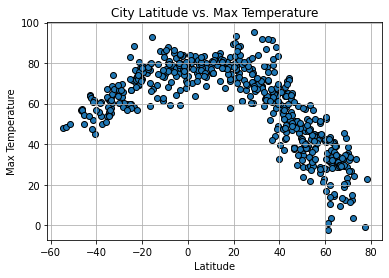

In [151]:
#Temperature Vs. Latitude
x_lat=city_weather["Lat"]
y_temp=city_weather["Max Temp"]
plt.scatter(x_lat, y_temp, marker='o',edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("City Latitude vs. Max Temperature")
plt.grid()
plt.savefig("./Images/lat_temp_scatter")
plt.show()

The scatter plot above visualizes the relationship between city latitudes and max temperature in Farenheight. The relationship between the two appears to create a normal distribution. Moving from the equator at a latitude of 0 the temperature will decrease as you move left and decrease as you move right. 

# Latitude vs. Humidity Plot

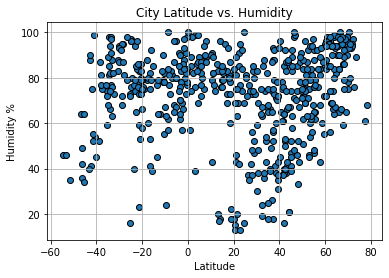

In [152]:
x_lat=city_weather["Lat"]
y_hum=city_weather["Humidity"]
plt.scatter(x_lat, y_hum, marker='o',edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title("City Latitude vs. Humidity")
plt.grid()
plt.savefig("./Images/lat_humidity_scatter")
plt.show()

The scatter plot above analyzes the relationship between city latitude and humidity. The majority of cities analyzed appear to have a humidity percent greater than 60. 

# Latitude vs. Cloudiness Plot

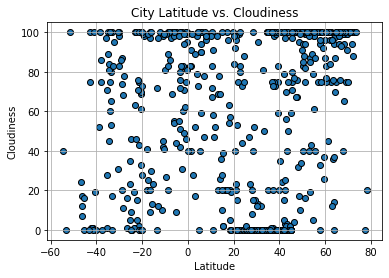

In [153]:
x_lat=city_weather["Lat"]
y_cloud=city_weather["Cloudiness"]
plt.scatter(x_lat, y_cloud, marker='o',edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs. Cloudiness")
plt.grid()
plt.savefig("./Images/lat_cloud_scatter")
plt.show()

The scatter plot above analyzed the relationship between city latitude and cloudiness. There appears to be no correlation between the two variables.

# Latitude vs. Wind Speed Plot

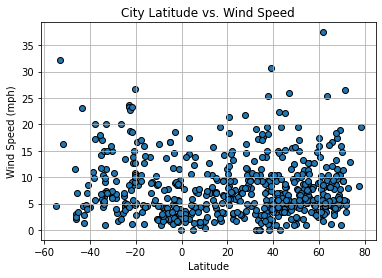

In [154]:
x_lat=city_weather["Lat"]
y_wind=city_weather["Wind Speed"]
plt.scatter(x_lat, y_wind, marker='o',edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed")
plt.grid()
plt.savefig("./Images/lat_wind_scatter")
plt.show()

The scatter plot above analyzes the relationship between city latitude and wind speed. The majority of cities analyzed have a wind speed less than 15 mph.

# Linear Regression

In [155]:
northern_weather=city_weather.loc[city_weather["Lat"]>=0]
northern_weather

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,khatanga,71.9667,102.5000,3.58,97.0,88.0,3.33,RU,1666393899
3,ardakan,32.3100,54.0175,68.50,19.0,0.0,3.11,IR,1666393899
4,albany,42.6001,-73.9662,52.45,52.0,3.0,3.69,US,1666393822
5,igrim,63.1906,64.4162,31.44,74.0,36.0,12.01,RU,1666393900
7,varniai,55.7406,22.3644,38.14,79.0,100.0,6.29,LT,1666393900
...,...,...,...,...,...,...,...,...,...
586,saint austell,50.3383,-4.7658,58.08,88.0,40.0,10.36,GB,1666394073
587,college,64.8569,-147.8028,34.59,94.0,100.0,8.05,US,1666394073
589,bereznik,62.8551,42.7072,28.44,94.0,12.0,5.19,RU,1666394074
590,mangan,27.5167,88.5333,60.28,42.0,0.0,7.90,IN,1666394074


In [156]:
southern_weather=city_weather.loc[city_weather["Lat"]<=0]
southern_weather

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,constitucion,-35.3333,-72.4167,53.92,74.0,1.0,14.14,CL,1666393857
2,hobart,-42.8794,147.3294,64.26,88.0,75.0,4.61,AU,1666393762
6,rikitea,-23.1203,-134.9692,70.74,74.0,1.0,23.67,PF,1666393900
9,caravelas,-17.7125,-39.2481,75.34,79.0,41.0,10.38,BR,1666393901
12,bengkulu,-3.8004,102.2655,75.25,91.0,99.0,4.94,ID,1666393902
...,...,...,...,...,...,...,...,...,...
583,manacapuru,-3.2997,-60.6206,84.63,64.0,76.0,5.77,BR,1666394072
584,muana,-1.5283,-49.2167,78.58,84.0,49.0,8.63,BR,1666394072
588,maraa,-1.8333,-65.3667,75.99,93.0,99.0,1.77,BR,1666393879
593,norsup,-16.0667,167.3833,79.92,79.0,100.0,14.05,VU,1666394075


# Northern Hemisphere- Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7484583935288536


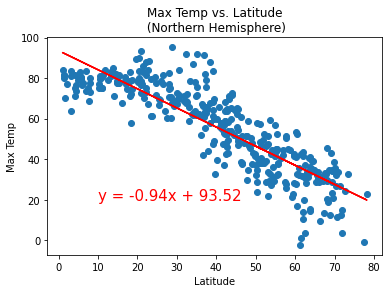

In [157]:

x_value=northern_weather["Lat"]
y_ntemp=northern_weather["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_ntemp)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value, y_ntemp)
plt.plot(x_value, regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Max Temp vs. Latitude\n (Northern Hemisphere)")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("./Images/temp_lat_north_regression")
plt.show()

The linear regression model above indicates that max temperatutre and latitude are highly dependent on each other. As evidenced by the r-squared value. This graph would be a useful predictive model. As the latitude increases, the temperature decreases in the northern hemisphere.

In [158]:
#Southern Hemisphere-Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5722487394478087


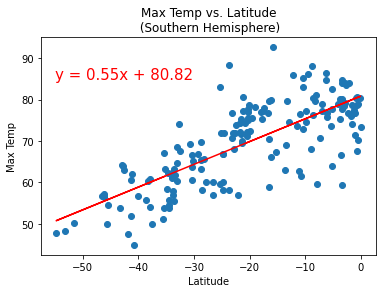

In [159]:

x_svalue=southern_weather["Lat"]
y_stemp=southern_weather["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_svalue, y_stemp)
regress_values = x_svalue * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_svalue, y_stemp)
plt.plot(x_svalue, regress_values,"r-")
plt.annotate(line_eq,(-55,85),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Max Temp vs. Latitude\n (Southern Hemisphere)")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("./Images/temp_lat_south_regression")
plt.show()

The relationship between max temperature and latitude in the southern hemisphere is positive as displayed by the r-squared value. And thus, can be used as a predictive model. As the latitude decreases, the max temperature incerases. It is clear that the southern hemisphere has significantly less cities to analyze compared to the northern hemisphere. This may be the reason the r-squared value is not as strong as the northern hemisphere's. 

In [160]:
#Northern Hemisphere-Humidity(%) vs. Latitude Linear Regression

The r-squared is: 0.03863281013138068


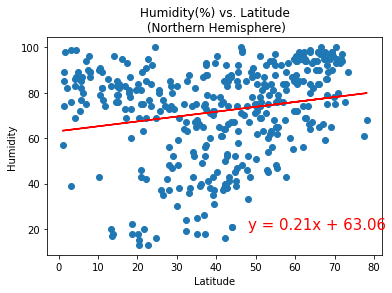

In [161]:
x_value=northern_weather["Lat"]
n_hum=northern_weather["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, n_hum)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value, n_hum)
plt.plot(x_value, regress_values,"r-")
plt.annotate(line_eq,(48,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Humidity(%) vs. Latitude\n (Northern Hemisphere)")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("./Images/humidity_lat_north_regression")
plt.show()

The scatter plot above analyzes the realtionship between humidity percentage and city latitude in the northern hemisphere. The r-squared value in this example is weak and therefore this would not be a valuable predictive model. 

In [ ]:
#Southern Hemisphere-Humidity(%) vs. Latitude Linear Regression

The r-squared is: 0.059681801142417897


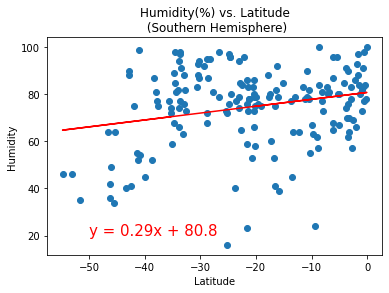

In [163]:
x_svalue=southern_weather["Lat"]
s_hum=southern_weather["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_svalue, s_hum)
regress_values = x_svalue * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_svalue, s_hum)
plt.plot(x_svalue, regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Humidity(%) vs. Latitude\n (Southern Hemisphere)")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("./Images/humidity_lat__south_regression")
plt.show()

The scatter plot above analyzes the relationship between humidity percentage and city latitude in the southern hemisphere. Although the linear regression model appears positive, the r-squared value itself is too low to have any predictive value between the two variables. 

In [164]:
#Northern Hemisphere- Cloudiness(%) vs. Latitude Linear Regression

The r-squared is: 0.08427191062920748


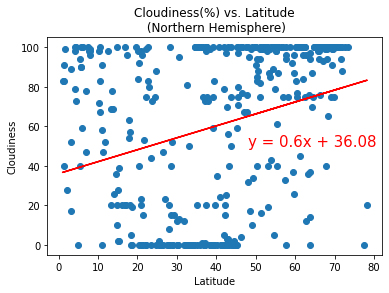

In [165]:
x_value=northern_weather["Lat"]
n_cloud=northern_weather["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, n_cloud)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value, n_cloud)
plt.plot(x_value, regress_values,"r-")
plt.annotate(line_eq,(48,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Cloudiness(%) vs. Latitude\n (Northern Hemisphere)")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("./Images/cloud_lat_north_regression")
plt.show()

The scatter plot above analyzes the linear regression between cloudiness and city latitude in the northern hemisphere. The variable values appear to have no dependency on each other. This would not be a useful predictive model. 

In [166]:
#Southern Hemisphere- Cloudiness(%) vs. Latitude Linear Regression

The r-squared is: 0.09429365728665091


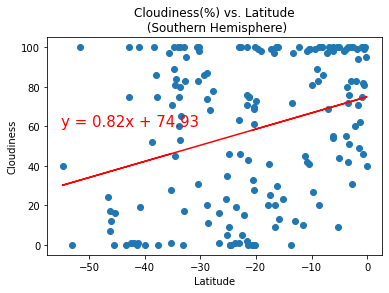

In [167]:
x_svalue=southern_weather["Lat"]
s_cloud=southern_weather["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_svalue, s_cloud)
regress_values = x_svalue * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_svalue, s_cloud)
plt.plot(x_svalue, regress_values,"r-")
plt.annotate(line_eq,(-55,60),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Cloudiness(%) vs. Latitude\n (Southern Hemisphere)")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("./Images/cloud_lat_south_regression")
plt.show()

The scatter plot above analyzes the relationship between cloudiness and city latitude int he southern hemisphere. Although the r-squared value between these two variables is greater than in the northern hemisphere, we cannot predict the dependency of cloudiness to latitude. 

In [168]:
#Northern Hemisphere-Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.01380464209514137


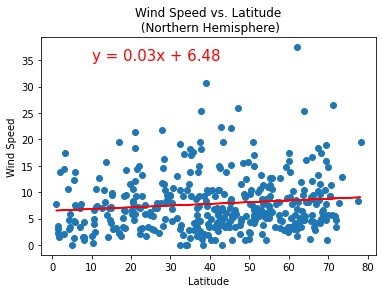

In [169]:
x_value=northern_weather["Lat"]
n_wind=northern_weather["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, n_wind)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value, n_wind)
plt.plot(x_value, regress_values,"r-")
plt.annotate(line_eq,(10,35),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Wind Speed vs. Latitude\n (Northern Hemisphere)")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("./Images/wind_lat_north_regression")
plt.show()

The scatter plot above analyzes the relationship between city latitude and wind speed in the northern hemisphere. The r-squared is a poor indication of the dependency of wind speed to city latitude. 

In [170]:
#Southern Hemisphere-Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.047042052450731627


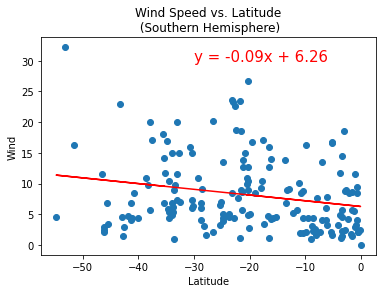

In [171]:
x_svalue=southern_weather["Lat"]
s_wind=southern_weather["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_svalue, s_wind)
regress_values = x_svalue * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_svalue, s_wind)
plt.plot(x_svalue, regress_values,"r-")
plt.annotate(line_eq,(-30,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind")
plt.title("Wind Speed vs. Latitude\n (Southern Hemisphere)")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("./Images/wind_lat_south_regression")
plt.show()

The scatter plot above analyzes relationship between wind speen and city latitude int eh southern hemisphere. The linear regression model and r-squared value are again, not a useful predictive model of the relationship between increasing latitude and wind speed. 